In [23]:
!nvidia-smi

Sat May 11 18:01:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   46C    P8              9W /  170W |     806MiB /  12288MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
import tensorflow as tf
import numpy as np

import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [25]:
IMAGE_SIZE = 640
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

RGB Red Green blue

In [26]:
train_dir = "C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\ImageClassYesAug\\train"
val_dir = "C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\ImageClassYesAug\\valid"
test_dir = "C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\ImageClassYesAug\\test"


In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 720 files belonging to 4 classes.


In [28]:
class_names = train_ds.class_names
class_names

['BlackGill', 'Healthy', 'Vibriosis', 'WSSV']

(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)


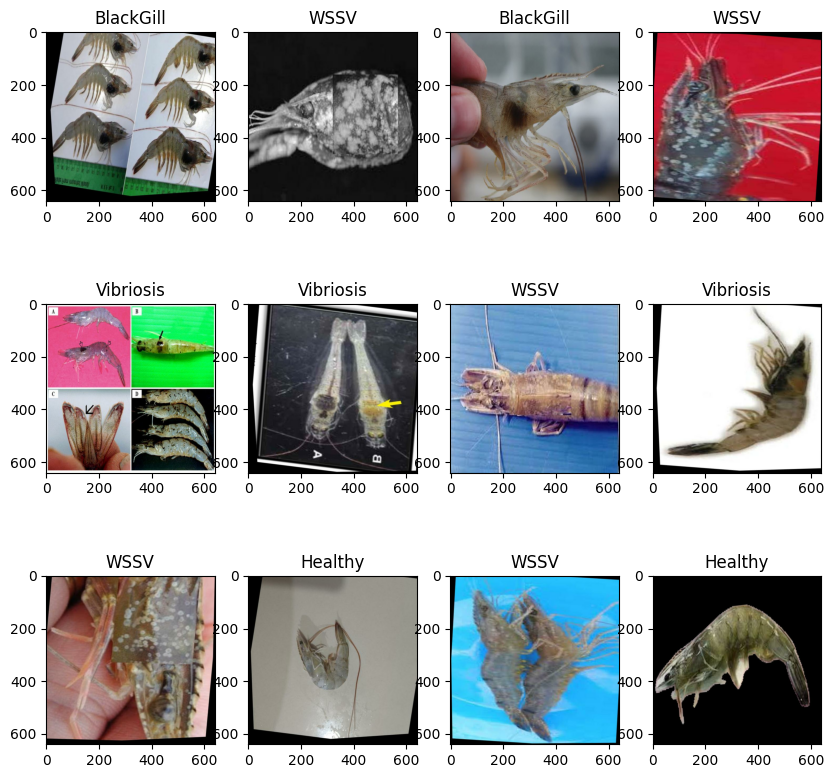

In [29]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    print(image_batch[i].shape)

In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 66 files belonging to 4 classes.


(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)


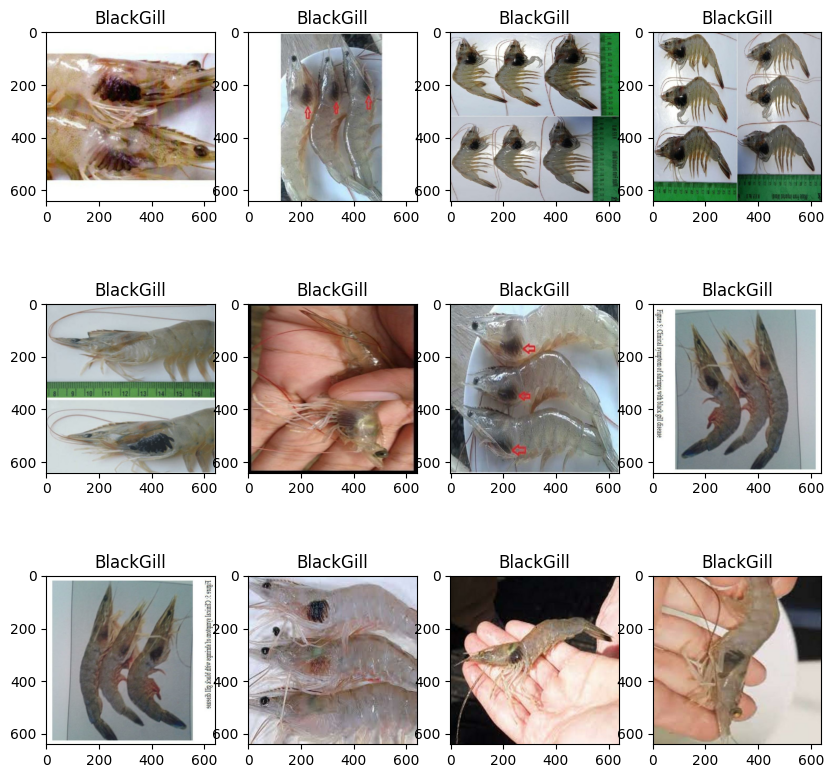

In [31]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in val_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    print(image_batch[i].shape)

In [32]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 32 files belonging to 4 classes.


(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)
(640, 640, 3)


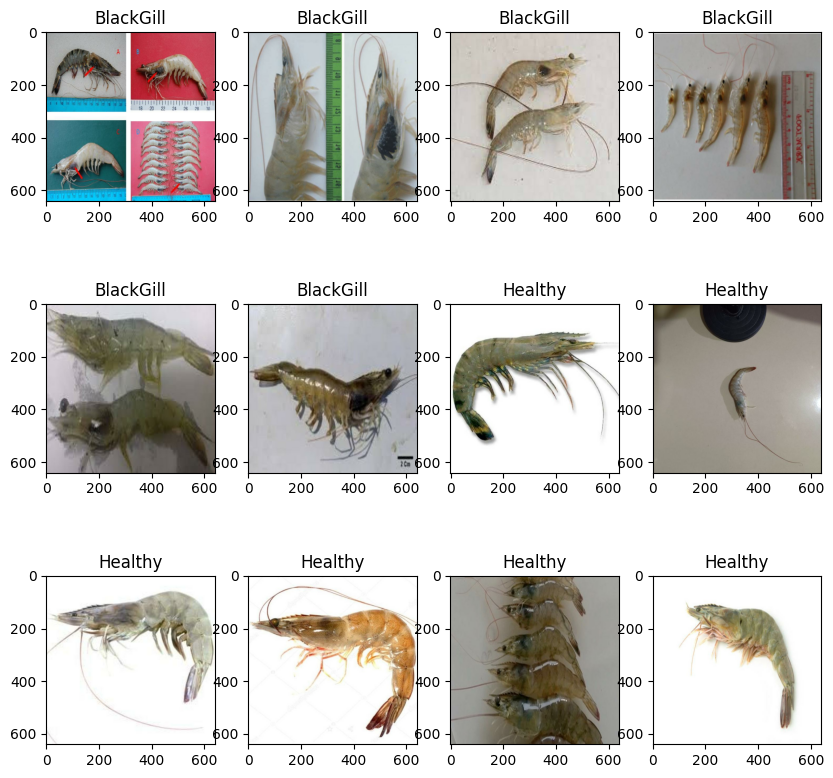

In [33]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    print(image_batch[i].shape)

In [34]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [35]:
from keras.layers import Input, Dropout, BatchNormalization

# Define the input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    Dropout(0.5),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 171s 7s/step - accuracy: 0.2487 - loss: 2.8841 - val_accuracy: 0.2273 - val_loss: 1.3780
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.3764 - loss: 1.3353 - val_accuracy: 0.3182 - val_loss: 1.3508
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.3908 - loss: 1.3066 - val_accuracy: 0.3939 - val_loss: 1.3152
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 154s 7s/step - accuracy: 0.4105 - loss: 1.2770 - val_accuracy: 0.3636 - val_loss: 1.2894
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.5501 - loss: 1.1864 - val_accuracy: 0.5303 - val_loss: 1.1635
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 162s 7s/step - accuracy: 0.4676 - loss: 1.1942 - val_accuracy: 0.4697 - val_loss: 1.1917
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.4870 - loss: 1.1621 - val_accuracy: 0.4697 - val_loss: 1.2112
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.5713 - loss: 1.0257 - val_accuracy: 0.3939 - v

In [41]:
scores = model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - accuracy: 0.5312 - loss: 1.8417


In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Accuracy')

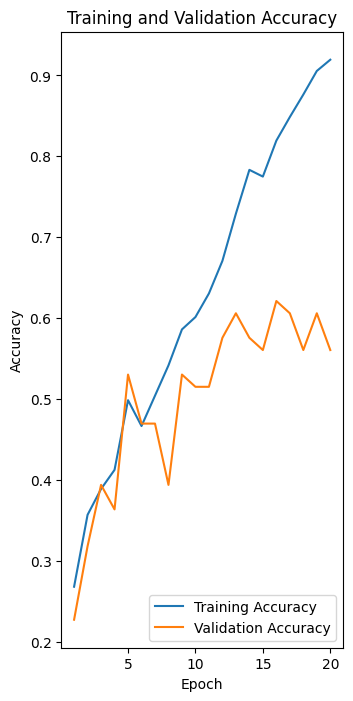

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

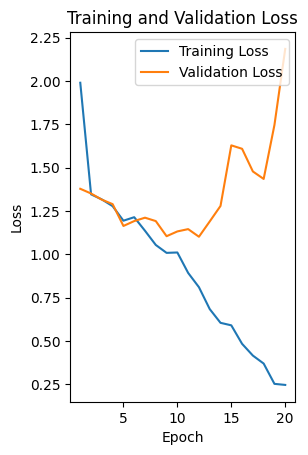

In [44]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [45]:
import numpy as np

# Function to predict the label and confidence for an image
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

First image to predict


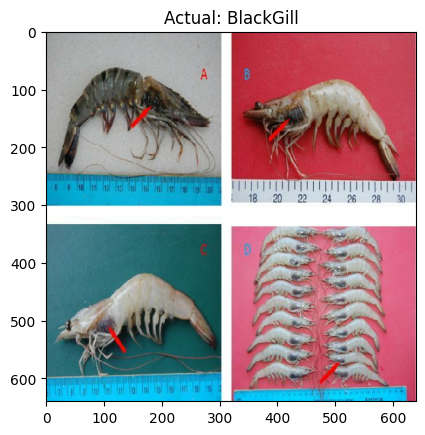

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted label: WSSV
Confidence: 99.95


In [46]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.title(f"Actual: {class_names[first_label]}")
    plt.show()

    # Make prediction for the first image
    predicted_label, confidence = predict(model, first_image)
    print("Predicted label:", predicted_label)
    print("Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


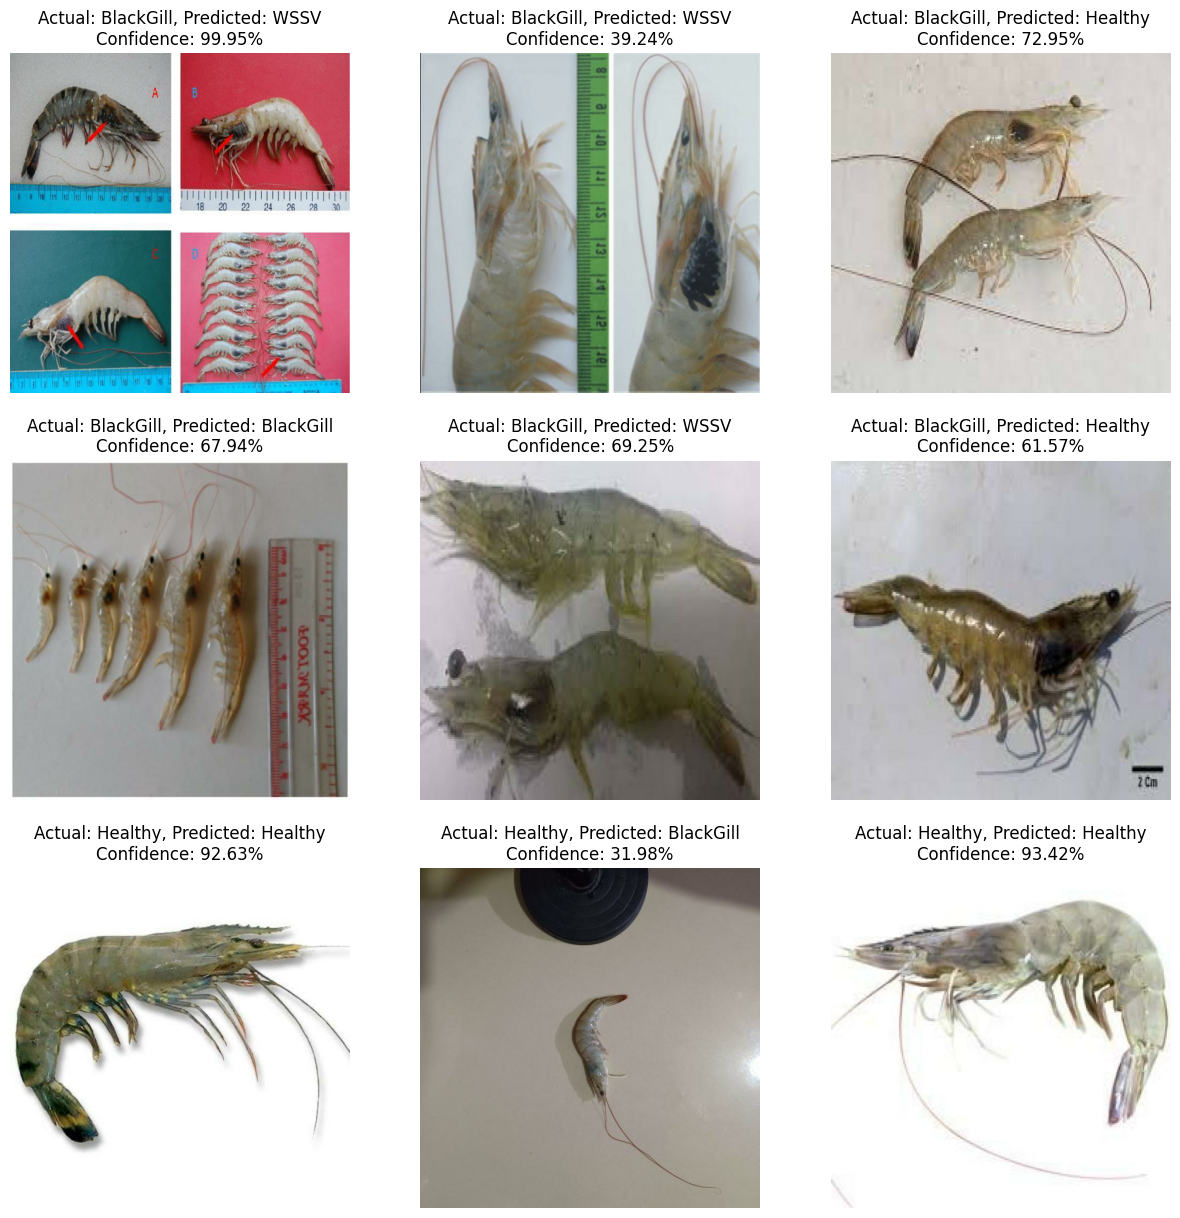

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Make prediction for each image in the batch
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

plt.show()

In [48]:
directory_path = "C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\Saved"
model_name = "ShrimpleSaved2"

In [51]:
model.export(directory_path)

INFO:tensorflow:Assets written to: C:\Users\Pyo\OneDrive - DEPED REGION 4A-3\Documents\GitHub\Shrimple\Saved\assets


INFO:tensorflow:Assets written to: C:\Users\Pyo\OneDrive - DEPED REGION 4A-3\Documents\GitHub\Shrimple\Saved\assets


Saved artifact at 'C:\Users\Pyo\OneDrive - DEPED REGION 4A-3\Documents\GitHub\Shrimple\Saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 640, 640, 3), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2289682837248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289682826336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289682834432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289706899888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289706897424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289706899008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289706893904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289696903360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289696901248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2289703441456: TensorSpec(shape=(), dtype=

In [95]:
import os
model.save(os.path.join(directory_path,"ShrimpleSaved2.keras"))

keras_model = tf.keras.models.load_model("C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\Saved\\ShrimpleSaved2.keras")

# Show the model architecture
keras_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 640, 640, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 638, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 317, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 156, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 78, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 76, 76, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 38, 38, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 369664)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    94,634,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,168,206 (1.06 GB)

 Trainable params: 95,056,068 (362.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,112,138 (725.22 MB)

In [106]:
import os
model.save(os.path.join(directory_path,"C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\Saved\\ShrimpleSaved2.h5"))
h5_model = tf.keras.models.load_model("C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\Saved\\ShrimpleSaved2.h5")

# Show the model architecture
h5_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 640, 640, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 638, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 317, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 156, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 78, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 76, 76, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 38, 38, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 369664)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    94,634,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,056,070 (362.61 MB)

 Trainable params: 95,056,068 (362.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


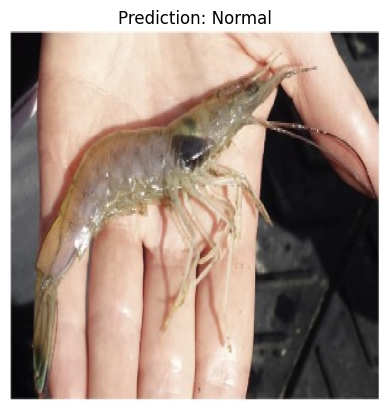

Displayed image: D:\Downloads\Downloads 2024\Jupyter Shrimple\1-s2.0-S0932473920300031-gr1.jpg
Predicted class: Normal


In [66]:
def predict_image(model, img_path, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

    return img, predicted_class

sample_img_path = "D:\\Downloads\\Downloads 2024\\Jupyter Shrimple\\1-s2.0-S0932473920300031-gr1.jpg"
img, predicted_class = predict_image(model, sample_img_path, dataset.class_names)

print("Displayed image:", sample_img_path)
print("Predicted class:", predicted_class)

In [67]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 640, 640, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 638, 638, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 319, 319, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 317, 317, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 158, 158, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 156, 156, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 78, 78, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 76, 76, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 38, 38, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 36, 36, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 18, 18, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 16, 16, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 8, 8, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 4096)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,288,718 (4.92 MB)

 Trainable params: 429,572 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 859,146 (3.28 MB)

None


In [58]:
def load_saved_model(model_path):
    """
    Load a previously saved model from the specified path.

    Args:
    - model_path (str): The path to the saved model.

    Returns:
    - loaded_model: The loaded model.
    """
    loaded_model = tf.keras.models.load_model(model_path)
    return loaded_model

def predict_with_loaded_model(loaded_model, img_path, class_names):
    """
    Predict the class of an image using a loaded model.

    Args:
    - loaded_model: The loaded model.
    - img_path (str): The path to the image file.
    - class_names (list): List of class names.

    Returns:
    - img: The loaded image.
    - predicted_class (str): The predicted class.
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0  # Normalize the image

    prediction = loaded_model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

    return img, predicted_class

# Example usage:
model_path = 'C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Desktop\\Jupyter Shrimple\\Test-20240427T184520Z-001\\Shrimple_Proto.keras'  # Path to the saved model
loaded_model = load_saved_model(model_path)

sample_img_path = 'D:\\Downloads\\Downloads 2024\\Jupyter Shrimple\\images(1).jpg'
img, predicted_class = predict_with_loaded_model(loaded_model, sample_img_path, dataset.class_names)

print("Displayed image:", sample_img_path)
print("Predicted class:", predicted_class)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Downloads\\Downloads 2024\\Jupyter Shrimple\\images(1).jpg'

In [52]:
import tensorflow as tf

# Save the Keras model as a .pbtxt file
# tf.keras.models.save_model(model, 'model.pbtxt')

# Convert the Keras model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model('C:\\Users\\Pyo\\OneDrive - DEPED REGION 4A-3\\Documents\\GitHub\\Shrimple\\Saved\\SavedModel2')
model_tflite = converter.convert()
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
# Save the TensorFlow Lite model as a .tflite file
with open("modelquant.tflite", "wb") as f:
    f.write(tflite_quant_model)


interpreter = tf.lite.Interpreter(model_path = tmpsgchtxmv)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])